In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/4b4552acae92b71b390feed74695315b90151935/avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
# Checking for NULL values
df.isnull().any()

Unnamed: 0      True
Date            True
AveragePrice    True
Total Volume    True
4046            True
4225            True
4770            True
Total Bags      True
Small Bags      True
Large Bags      True
XLarge Bags     True
type            True
year            True
region          True
dtype: bool

In [5]:
# Dropping the rows having null values
df.dropna(inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
# Modifying the Column Name
df.rename(columns={'4046':'Small','4225':'Large','4770':'X_Large','AveragePrice':'AvPrice','Total Volume':'Total_vol','Small Bags':'Small_bags','Total Bags':'Total_bags','Large Bags':'Large_bags','XLarge Bags':'XLarge_bags'},inplace=True)


In [7]:
# Lets Drop the index column
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [8]:
# So Now we have our desired Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1517 non-null   object 
 1   AvPrice      1517 non-null   float64
 2   Total_vol    1517 non-null   float64
 3   Small        1517 non-null   float64
 4   Large        1517 non-null   float64
 5   X_Large      1517 non-null   float64
 6   Total_bags   1517 non-null   float64
 7   Small_bags   1517 non-null   float64
 8   Large_bags   1517 non-null   float64
 9   XLarge_bags  1517 non-null   float64
 10  type         1517 non-null   object 
 11  year         1517 non-null   float64
 12  region       1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [9]:
# Lets Change the Date column to dateTime
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Extracting year, Month, day and Week from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.week
df.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,type,year,region,Year,Month,Day,Week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,2015,12,27,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,2015,12,20,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,2015,12,13,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,2015,6,12,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,2015,11,29,48


In [11]:
# So, now as we already extracted the Year column from Date, lets drop the year column which we already had from before
df.drop('year',axis=1,inplace=True)

In [12]:
df.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,type,region,Year,Month,Day,Week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,6,12,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29,48


In [13]:
# Lets See the total unique value we have in 'Year','type' and 'region'
print("Total unique values in Year is: ",df.Year.nunique())
print("Total unique values in type is: ",df.type.nunique())
print("Total unique values in region is: ",df.region.nunique())    

Total unique values in Year is:  2
Total unique values in type is:  1
Total unique values in region is:  51


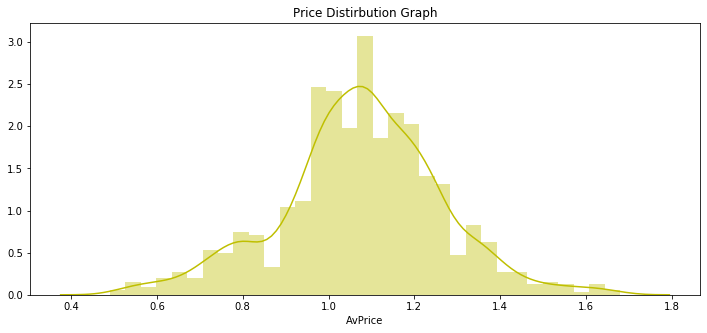

In [14]:
# Distribution of Average Price
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["AvPrice"], color = 'y')

Text(0.5, 1.0, 'Average Price by Month')

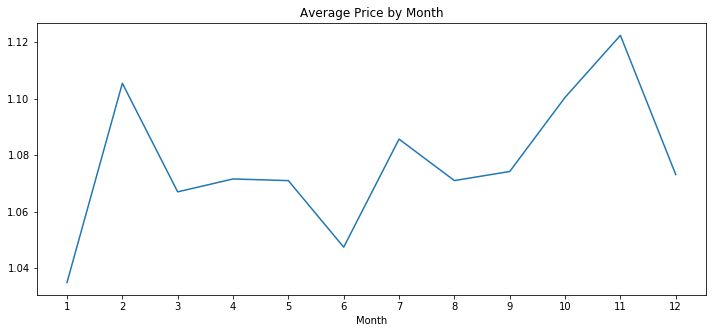

In [15]:
# Price distribution as per Months
monthgroup=df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13))
monthgroup['AvPrice'].plot(x=df.Month)
plt.title('Average Price by Month')

Text(0.5, 1.0, 'Average Price by Week')

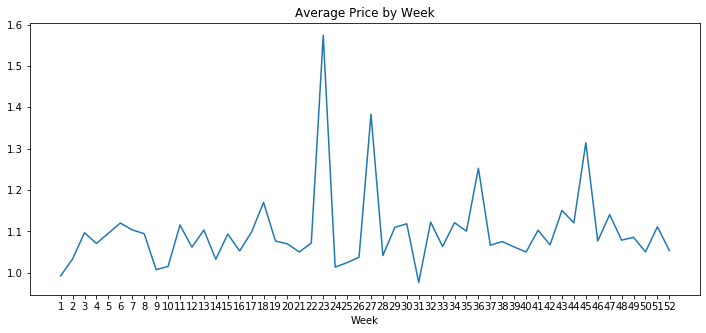

In [16]:
# Price distribution as per week
weekgroup=df.groupby('Week').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(1,53))
weekgroup['AvPrice'].plot(x=df.Week)
plt.title('Average Price by Week')

Text(0.5, 1.0, 'Average Price by Day')

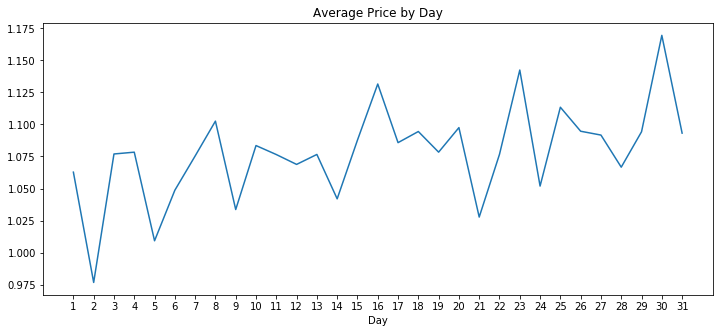

In [17]:
# Atlast Price as per Day
daygroup=df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(1,32))
daygroup['AvPrice'].plot(x=df.Day)
plt.title('Average Price by Day')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

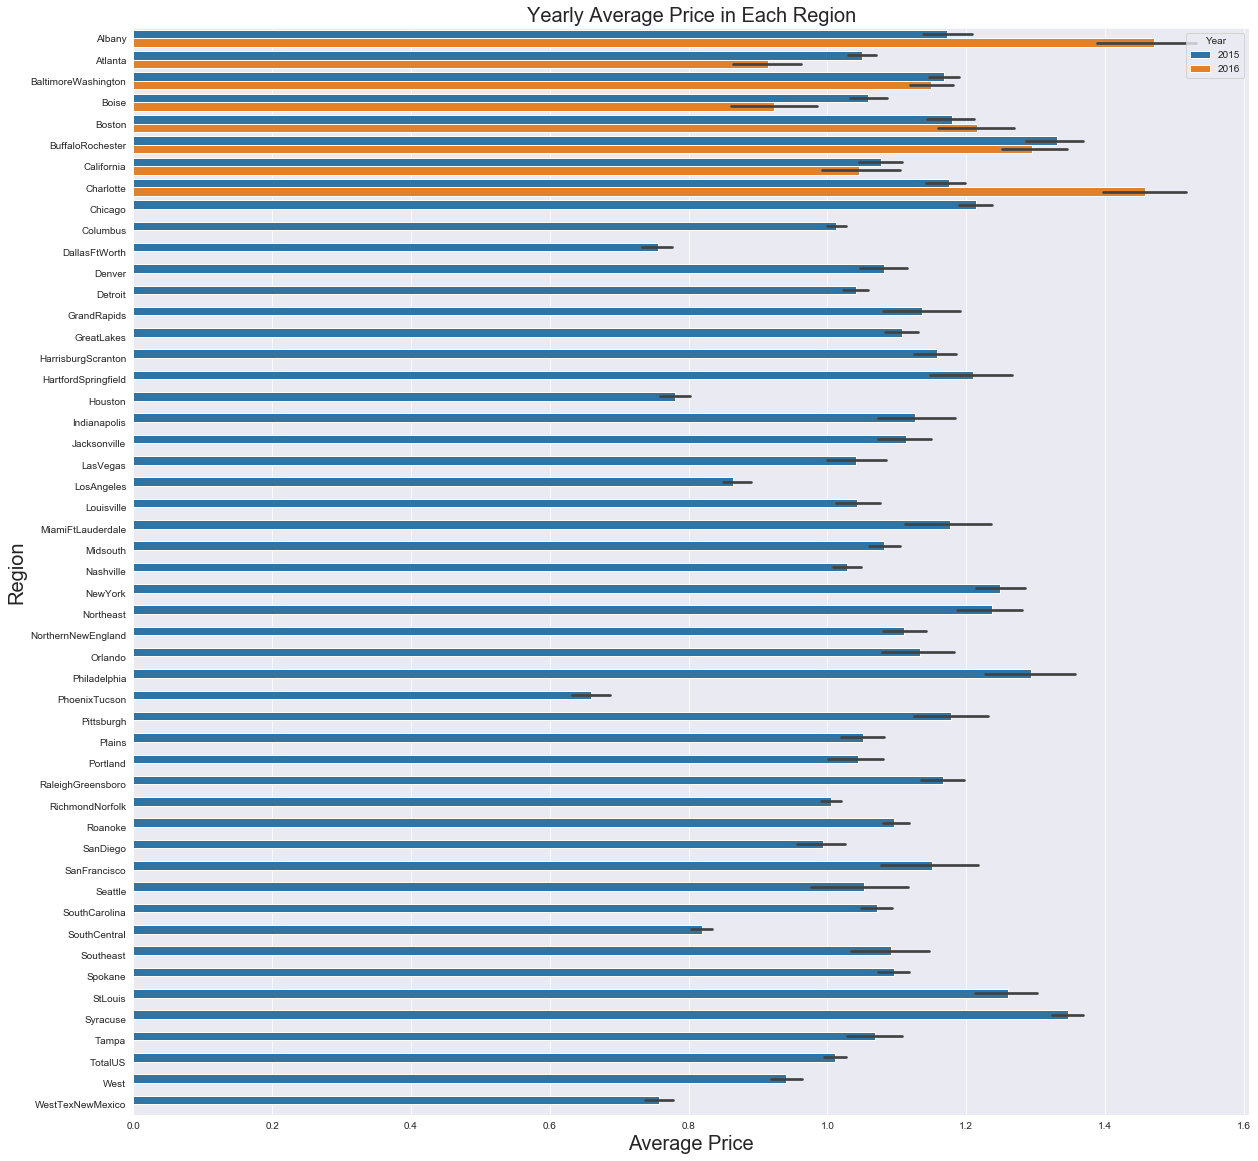

In [18]:
# Price as per region in both years
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
sns.barplot(x='AvPrice',y='region',data=df, hue='Year')
plt.xlabel('Average Price',{'fontsize' :20})
plt.ylabel('Region',{'fontsize':20})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

- We can see that most of the sale are in the year 2015 with regions like 'Albany', 'Charlotte', 'Philadhelphia', 'Syracuse'
  having the highest Average price

2015    1270
2016     247
Name: Year, dtype: int64


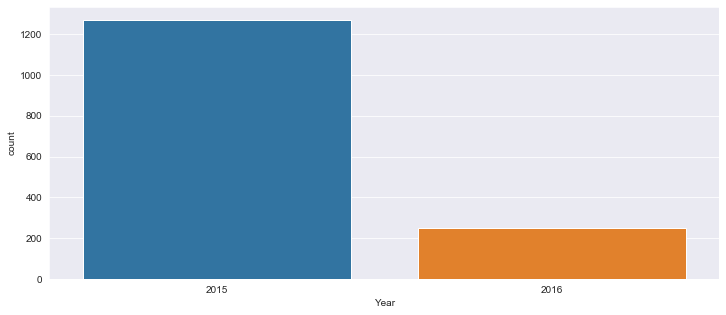

In [19]:
# Lets count the number of sales in both the year
print(df['Year'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(df['Year'])
plt.show()

- There is huge difference in the number of sales as per year

In [20]:
df.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,type,region,Year,Month,Day,Week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,6,12,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29,48


Text(0.5, 1.0, 'Average of Total Avocado Consumed as claimed by Region')

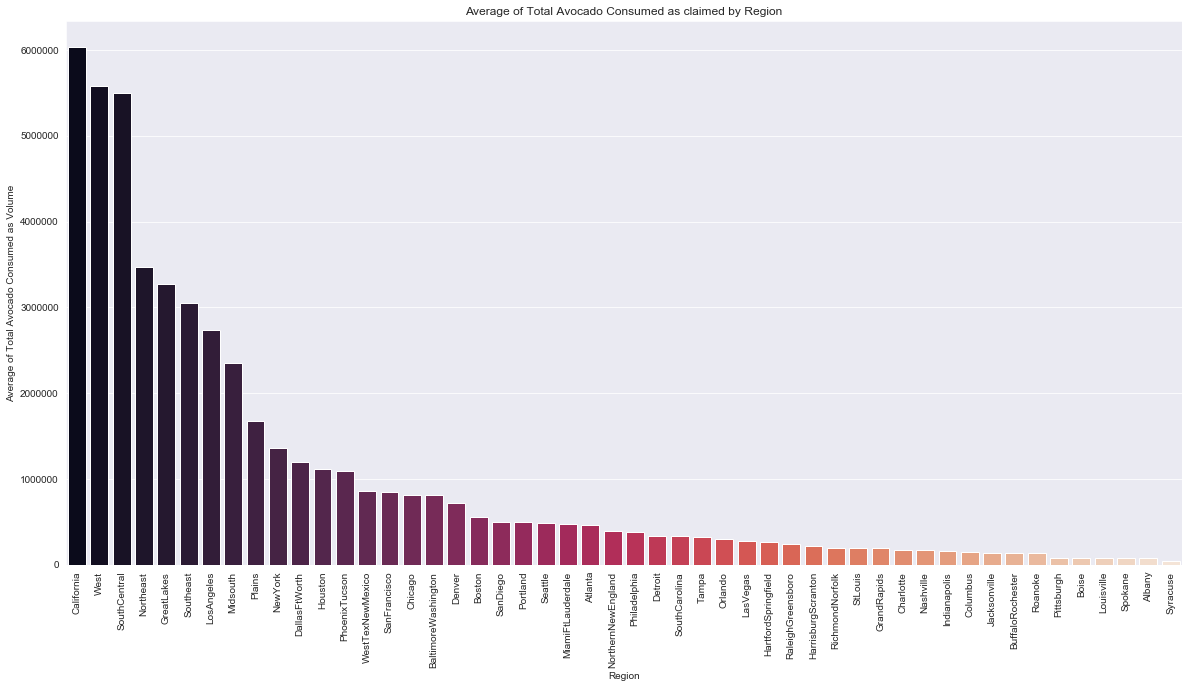

In [21]:
Axe=df.region!='TotalUS'
data=df[Axe]
region = list(data.region.unique())
avg_consumption = []
for i in region:
    x=data[data.region==i]
    avg_consumption.append(sum(x['Total_vol'])/len(x))
df2=pd.DataFrame({'region':region,'Average_vol_of_Avocado_sold':avg_consumption})

re_index=df2.Average_vol_of_Avocado_sold.sort_values(ascending=False).index.values
final_data=df2.reindex(re_index)
plt.figure(figsize=(20,10))
bx=sns.barplot(x=final_data.region,y=final_data.Average_vol_of_Avocado_sold,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Avocado Consumed as Volume')
plt.title('Average of Total Avocado Consumed as claimed by Region')

- Above is the graph of Total avocado consumed as per region.
- Califorina, West, SouthCentral, NorthEast and Greatlakes are the top 5 regions with highest consumption

Text(0.5, 1.0, 'Total sell According to Region')

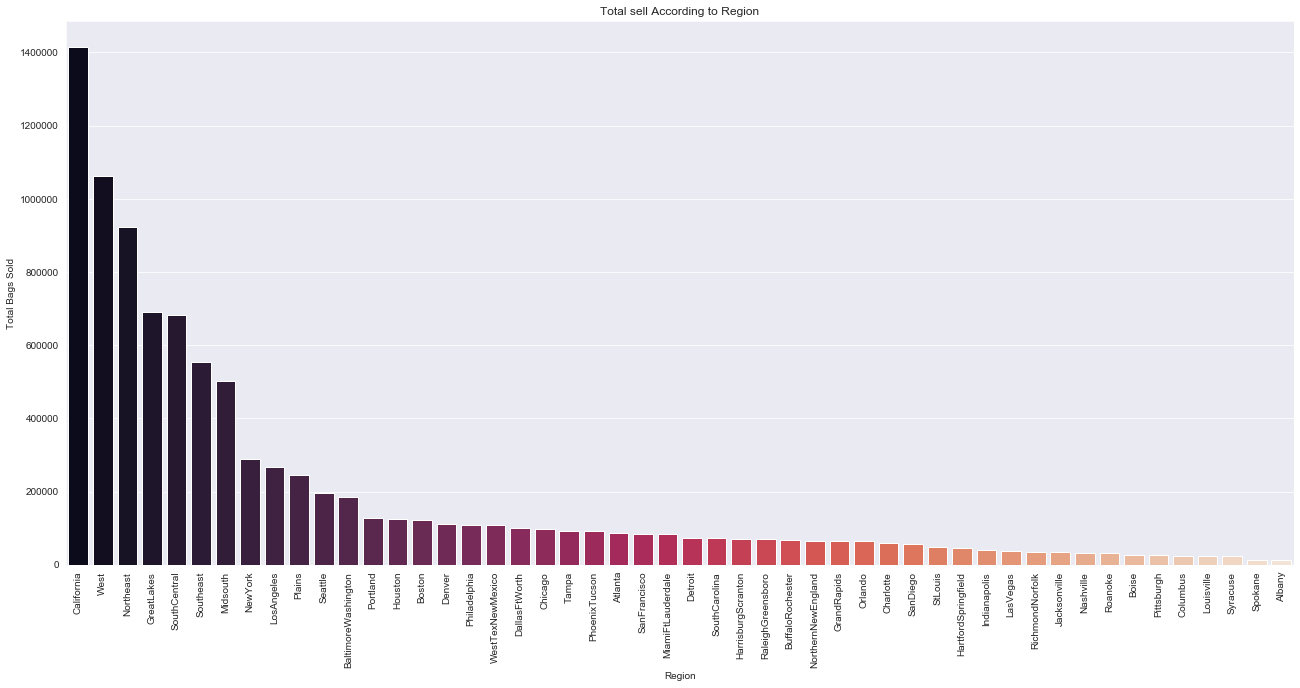

In [22]:
Filter1=df.region!='TotalUS'
df2=df[Filter1]
region = list(df2.region.unique())
highest_sale = []
for i in region:
    x=df2[df2.region==i]
    highest_sale.append(sum(x['Total_bags'])/len(x))
df3=pd.DataFrame({'region':region,'Highest_Sale':highest_sale})

new_index=df3.Highest_Sale.sort_values(ascending=False).index.values
sorted_data=df3.reindex(new_index)
plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data.region,y=sorted_data.Highest_Sale,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Bags Sold')
plt.title('Total sell According to Region')

 - Total bags sold as per region

Text(0.5, 1.0, 'Average Price According to Region')

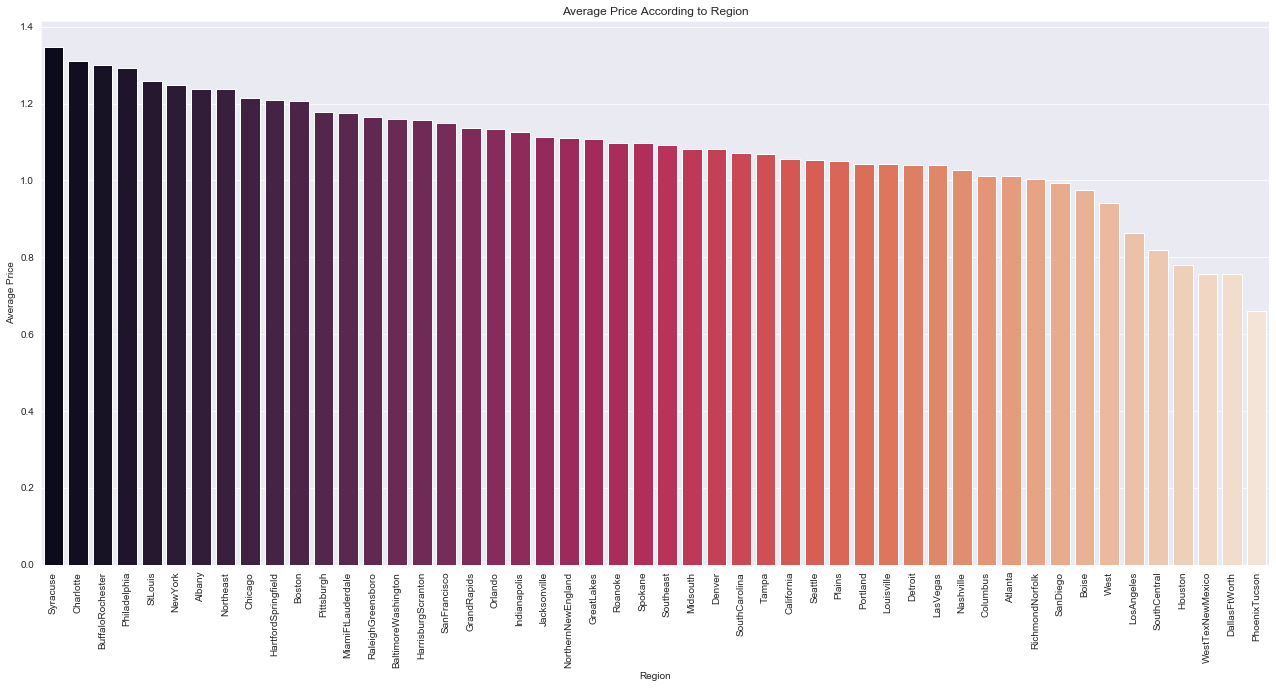

In [23]:
Filter1=df.region!='TotalUS'
dft=df[Filter1]
region = list(dft.region.unique())
Average_price = []
for i in region:
    x=dft[dft.region==i]
    Average_price.append(sum(x['AvPrice'])/len(x))
dfx=pd.DataFrame({'region':region,'Avg_Price':Average_price})

new_index1=dfx.Avg_Price.sort_values(ascending=False).index.values
sorted_data=dfx.reindex(new_index1)
plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data.region,y=sorted_data.Avg_Price,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

 - Average price distribution as per region
 - Syracuse and charlotte are having highest avg price followed by BuffaloRochester and Philadelphia

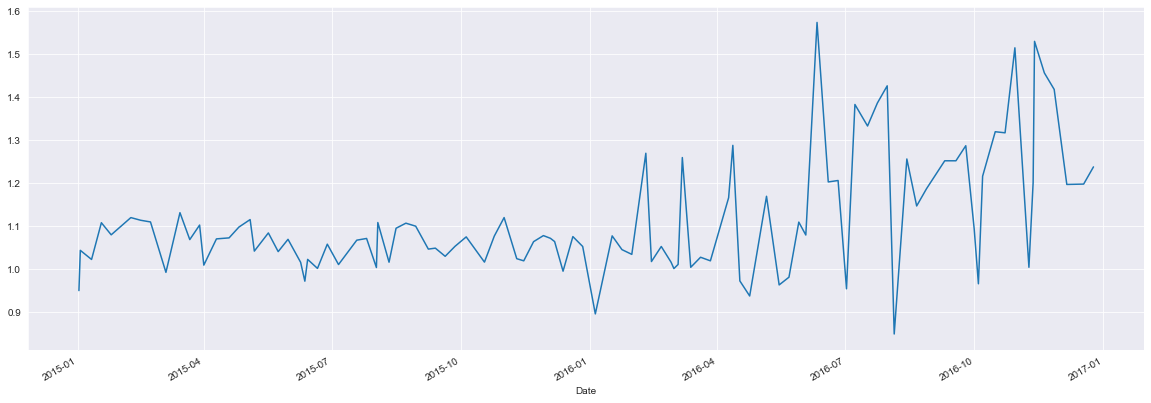

In [24]:
asd = df.groupby('Date').mean()
plt.figure(figsize=(20,7))
asd['AvPrice'].plot()

 - Above graph gives us the idea of price distribution as we move ahead with dates

# Lets Check the Outliers for columns having continious value

In [25]:
df2 = df.copy()
df2.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,type,region,Year,Month,Day,Week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,6,12,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29,48


In [26]:
qwe = ['AvPrice','Total_vol','Small','Large','X_Large','Total_bags','Small_bags','Large_bags','XLarge_bags']
for col in qwe:
    col_zscore = col + '_zscore'
    df2[col_zscore] = (df2[col] - df2[col].mean())/df2[col].std(ddof=0)

In [27]:
df2.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,...,Week,AvPrice_zscore,Total_vol_zscore,Small_zscore,Large_zscore,X_Large_zscore,Total_bags_zscore,Small_bags_zscore,Large_bags_zscore,XLarge_bags_zscore
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,52,1.350481,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,51,1.456397,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,50,-0.767838,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,24,0.026531,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,48,1.085691,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727


 - We certainly have some columns having zscore more or less than +/- 3

In [28]:
df_no_outliers = df2[(df2.AvPrice_zscore>-3) & (df2.AvPrice_zscore<3)
                     & (df2.Total_vol_zscore>-3) & (df2.Total_vol_zscore<3)
                     & (df2.Small_zscore>-3) &( df2.Small_zscore<3)
                     & (df2.Large_zscore>-3) & (df2.Large_zscore<3)
                     & (df2.X_Large_zscore>-3) & (df2.X_Large_zscore<3)
                     & (df2.Total_bags_zscore>-3) & (df2.Total_bags_zscore<3)
                     & (df2.Small_bags_zscore>-3) & (df2.Small_bags_zscore<3)
                     & (df2.Large_bags_zscore>-3) & (df2.Large_bags_zscore<3)
                     & (df2.XLarge_bags_zscore>-3) & (df2.XLarge_bags_zscore<3)]
df_no_outliers.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,...,Week,AvPrice_zscore,Total_vol_zscore,Small_zscore,Large_zscore,X_Large_zscore,Total_bags_zscore,Small_bags_zscore,Large_bags_zscore,XLarge_bags_zscore
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,52,1.350481,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,51,1.456397,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,50,-0.767838,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,24,0.026531,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,48,1.085691,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727


In [29]:
df_no_outliers.shape

(1436, 25)

In [30]:
df2.shape

(1517, 25)

 - We can see that there were 81 rows having zscore more or less than +/- 3. 
 - After removing those rows we have our dataset with almost no outliers

In [31]:
df9 = df_no_outliers.copy()

# Label encoding for the categorical column

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['region','type']
for i in variable:
    df9[i] = lb.fit_transform(df9[i])

In [33]:
df9.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,...,Week,AvPrice_zscore,Total_vol_zscore,Small_zscore,Large_zscore,X_Large_zscore,Total_bags_zscore,Small_bags_zscore,Large_bags_zscore,XLarge_bags_zscore
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,52,1.350481,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,51,1.456397,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,50,-0.767838,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,24,0.026531,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,48,1.085691,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727


 - Lets drop the zscore columns as we don't need it now anymore

In [34]:
df9.drop(['AvPrice_zscore','Total_vol_zscore','Small_zscore','Large_zscore','X_Large_zscore',
          'Total_bags_zscore','Small_bags_zscore','Large_bags_zscore','XLarge_bags_zscore'],axis=1,inplace=True)

In [35]:
# We will use this dataset for the price prediction 
df10 = df9.copy()

In [36]:
df9.drop('type',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
AvPrice,1436.0,1.077180,1.880375e-01,0.51,0.9800,1.080,1.1900,1.64
Total_vol,1436.0,907983.907228,1.497344e+06,38750.74,141879.5125,368249.990,840666.8875,8567534.49
Small,1436.0,360388.753837,7.551169e+05,467.72,18187.0050,70173.295,266797.5750,4668964.65
Large,1436.0,357322.463175,5.637546e+05,1783.77,40144.5100,99780.625,408836.8025,3403145.10
X_Large,1436.0,28770.081894,5.908033e+04,0.00,791.1475,6538.970,20885.9175,426600.81
Total_bags,1436.0,161502.608322,2.839024e+05,3311.77,34398.8900,70421.300,129766.9175,2391861.16
Small_bags,1436.0,136707.434297,2.449930e+05,3311.77,28130.9600,57828.465,111062.6350,2122673.09
Large_bags,1436.0,23921.906400,4.951194e+04,0.00,440.3675,4246.265,21589.4675,343389.61
XLarge_bags,1436.0,873.267625,2.912689e+03,0.00,0.0000,0.000,180.3450,23926.61
region,1436.0,20.841922,1.572382e+01,0.00,5.0000,19.000,34.0000,49.00


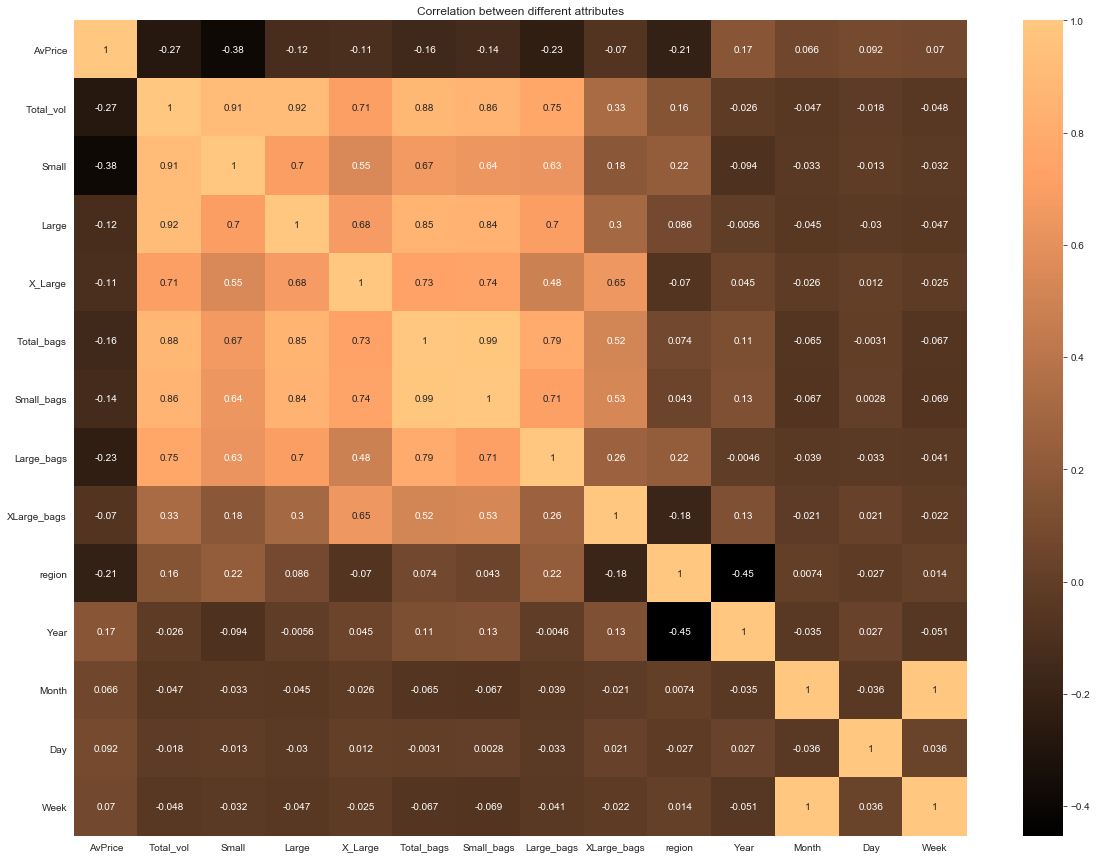

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df9.drop('type',axis=1).corr(),vmax=1,annot=True,cmap='copper')
plt.title("Correlation between different attributes")
plt.show()

In [38]:
print(df9.corr()["region"].abs().sort_values(ascending=False))

region         1.000000
Year           0.452859
Small          0.224808
Large_bags     0.223762
AvPrice        0.210825
XLarge_bags    0.176173
Total_vol      0.156954
Large          0.085592
Total_bags     0.074500
X_Large        0.070162
Small_bags     0.043205
Day            0.026585
Week           0.013565
Month          0.007372
type                NaN
Name: region, dtype: float64


- We can clearly see that columns like [Day,Week,Month,type] are least correlated with the target attribute "Region"

In [39]:
df5 = df9.drop(['Date','region','Month','Day','Week','type'],axis=1)
df6 = pd.DataFrame(df9['region'])

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df5,df6,test_size=0.3,random_state=101)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=3)
print(confusion_matrix(y_test,pred_rf))
print(cross_val.mean())

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.87      1.00      0.93        13
           2       0.90      1.00      0.95        18
           3       1.00      1.00      1.00        23
           4       1.00      0.88      0.93        16
           5       0.88      1.00      0.93        14
           6       1.00      1.00      1.00        13
           7       0.78      1.00      0.88         7
           8       1.00      1.00      1.00         6
           9       1.00      0.77      0.87        13
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         4
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         4
          16       0.67      1.00      0.80         2
          17       0.86    

 - This seems to be a good model after cross_validation and the accuracy score also looks pretty good.

Text(0, 0.5, 'Predicted Y')

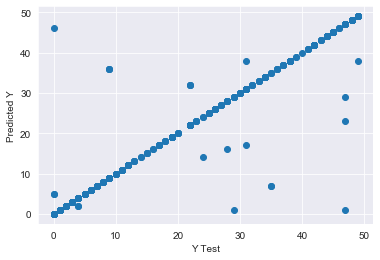

In [42]:
plt.scatter(x=y_test,y=pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 - The above graph is of actual y value and predicted y

In [54]:
# lets save our model using joblib
from sklearn.externals import joblib
joblib.dump(rf,'Avocado_region_analysis.pkl')

['Avocado_region_analysis.pkl']

# Average Price Prediction

In [43]:
df10.head()

,Date,AvPrice,Total_vol,Small,Large,X_Large,Total_bags,Small_bags,Large_bags,XLarge_bags,type,region,Year,Month,Day,Week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,6,12,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29,48


In [44]:
print(df10.corr()["AvPrice"].abs().sort_values(ascending=False))

AvPrice        1.000000
Small          0.380282
Total_vol      0.271504
Large_bags     0.229402
region         0.210825
Year           0.173229
Total_bags     0.157514
Small_bags     0.135342
Large          0.120872
X_Large        0.110292
Day            0.091823
Week           0.069665
XLarge_bags    0.069536
Month          0.066069
type                NaN
Name: AvPrice, dtype: float64


 - We can see that 'type', 'Month', 'XLarge_bags' and 'Week' are least correlated with the target variable (AvPrice).

In [45]:
df4 = df9.drop(['Date','AvPrice','Month','XLarge_bags','Week','type'],axis=1)
df7 = pd.DataFrame(df9['AvPrice'])

 - Random Forest Regressor

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(df4,df7,test_size=0.2,random_state=100)
rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)
pred_rgr = rgr.predict(X_test)

 - Cross Validating the Model

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rgr,X_train, y_train, scoring='r2', cv=5)
scores 

array([0.8259968 , 0.82265236, 0.77511348, 0.81803154, 0.85182498])

In [48]:
# Checking the MAE, MSE, RMSE errors.
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('MAE:', metrics.mean_absolute_error(y_test, pred_rgr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rgr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rgr)))

Accuracy: 0.82 (+/- 0.05)
MAE: 0.05557881944444449
MSE: 0.005880466006944455
RMSE: 0.07668419659189536


Text(0, 0.5, 'Predicted Y')

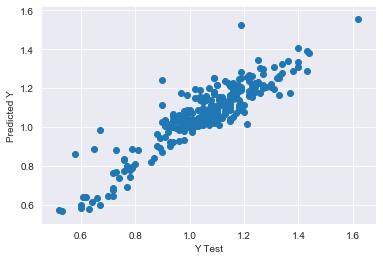

In [49]:
# Plotting the actual y and predicted y
plt.scatter(x=y_test,y=pred_rgr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
X_train1,X_test1,y_train1,y_test1=train_test_split(df4,df7,test_size=0.2,random_state=100)
dtr=DecisionTreeRegressor()
dtr.fit(X_train1,y_train1)
pred_dtr=dtr.predict(X_test1)

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr,X_train, y_train, scoring='r2', cv=3)
scores 

array([0.65829704, 0.55967988, 0.59027649])

In [52]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

Accuracy: 0.60 (+/- 0.08)
MAE: 0.07062500000000001
MSE: 0.009868055555555555
RMSE: 0.09933808713457067


Text(0, 0.5, 'Predicted Y')

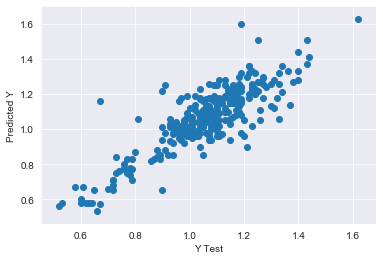

In [53]:
plt.scatter(x=y_test,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 - From the above model Random forest Regressor is having better performance in terms of error and cross validation both \
 - So lets move ahead with the first model Random Forest Regressor

In [55]:
# lets save our model using joblib
from sklearn.externals import joblib
joblib.dump(rf,'Avocado_price_analysis.pkl')

['Avocado_price_analysis.pkl']